In [3]:
from asset_tracker.models import load_spatialite_sqlite_extension
from sqlalchemy import create_engine

database_engine = create_engine('sqlite://', echo=True)
load_spatialite_sqlite_extension(database_engine)

2020-02-07 03:43:22,428 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-02-07 03:43:22,429 INFO sqlalchemy.engine.base.Engine ()
2020-02-07 03:43:22,431 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-02-07 03:43:22,433 INFO sqlalchemy.engine.base.Engine ()
2020-02-07 03:43:22,440 INFO sqlalchemy.engine.base.Engine SELECT InitSpatialMetaData() AS "InitSpatialMetaData_1"
2020-02-07 03:43:22,442 INFO sqlalchemy.engine.base.Engine ()


Engine(sqlite://)

In [4]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

get_database_session = sessionmaker()
get_database_session.configure(bind=database_engine)
db = get_database_session()

In [5]:
from asset_tracker.models.meta import Base
Base.metadata.create_all(database_engine)

2020-02-07 03:43:23,246 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("asset")
2020-02-07 03:43:23,248 INFO sqlalchemy.engine.base.Engine ()
2020-02-07 03:43:23,249 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("bus")
2020-02-07 03:43:23,250 INFO sqlalchemy.engine.base.Engine ()
2020-02-07 03:43:23,251 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("connection")
2020-02-07 03:43:23,252 INFO sqlalchemy.engine.base.Engine ()
2020-02-07 03:43:23,253 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("line_type")
2020-02-07 03:43:23,254 INFO sqlalchemy.engine.base.Engine ()
2020-02-07 03:43:23,257 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE asset (
	id VARCHAR NOT NULL, 
	creation_datetime DATETIME, 
	modification_datetime DATETIME, 
	name VARCHAR, 
	type_code VARCHAR(11), 
	attributes BLOB, 
	CONSTRAINT pk_asset PRIMARY KEY (id), 
	CHECK (type_code IN ('LINE', 'METER', 'TRANSFORMER', 'SUBSTATION'))
)


2020-02-07 03:43:23,259 INFO sqlalchemy.engine.base.Engine (

In [5]:
# Load JSON
import json
datasets_folder = join(repository_folder, 'datasets')
assets_geojson_path = join(datasets_folder, 'assets1.geojson')

In [6]:
asset_feature_collection = json.load(open(assets_geojson_path, 'rt'))
asset_feature_collection.keys()

dict_keys(['type', 'features'])

In [7]:
asset_feature = asset_feature_collection['features'][0]
asset_feature

{'type': 'Feature',
 'properties': {'id': 1},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-93.26308908888744, 37.24319981451458],
    [-93.26318564841199, 37.24167951084914],
    [-93.26111498305252, 37.24163680524727],
    [-93.261018423528, 37.243216896403936],
    [-93.26308908888744, 37.24319981451458]]]}}

In [15]:
from shapely.geometry import shape
type(shape(asset_feature['geometry']))

shapely.geometry.polygon.Polygon

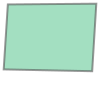

In [16]:
geometry = shape(asset_feature['geometry'])
geometry

In [17]:
from geoalchemy2.shape import from_shape, to_shape
from_shape(geometry)

<WKBElement at 0x7fc6f03a3550; 010300000001000000050000002f2d9e73d65057c0e0dde82b219f4240302d9e08d85057c0ec9aad5aef9e4240322d9e1bb65057c0020670f4ed9e4240332d9e86b45057c0dcf133bb219f42402f2d9e73d65057c0e0dde82b219f4240>

In [19]:
for asset_feature in asset_feature_collection['features']:
    shapely_geometry = shape(asset_feature['geometry'])
    print(from_shape(shapely_geometry))

010300000001000000050000002f2d9e73d65057c0e0dde82b219f4240302d9e08d85057c0ec9aad5aef9e4240322d9e1bb65057c0020670f4ed9e4240332d9e86b45057c0dcf133bb219f42402f2d9e73d65057c0e0dde82b219f4240
0101000000302d9e93c55057c0efe39f940d9f4240
0101000000332d9e6b485057c0f9475329889f4240
010200000004000000302d9e93c55057c029860429099f4240332d9ee3b15057c0e01e99202a9f42402e2d9e2fb15057c03e5268376a9f4240302d9e6b485057c0c0a5ee948c9f4240
